# Analysis Top 100 Spotify Tracks of 2018

At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year. This year's playlist (Top Tracks of 2018) includes 100 songs. The question is: **`What do these top songs have in common? Why do people like them?`**

**`Original Data Source:`** The audio features for each song were extracted using the Spotify Web API and the spotipy Python library. Credit goes to Spotify for calculating the audio feature values.

**`Data Description:`** There is one .csv file in the dataset. (top2018.csv) This file 

**`includes:`**

* Spotify URI for the song
* Name of the song
* Artist(s) of the song
* Audio features for the song (such as danceability, tempo, key etc.)
* A more detailed explanation of the audio features can be found in the Metadata tab.

**`Exploring the Data:`** Some suggestions for what to do with the data:

1. Look for patterns in the audio features of the songs. Why do people stream these songs the most?
2. Try to predict one audio feature based on the others
3. See which features correlate the most

**`NOTE:`** *At the end of this notebook you will be providing the conclusions of the study*

# import libraries 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import pearsonr
%matplotlib inline 

In [2]:
df=pd.read_csv('top2018.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [4]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


**We perform the conversion of the colum duration to place it in standard format (minutes:seg )**

In [5]:
df['Duration_min']=df['duration_ms']/60000

In [6]:
df.drop(columns='duration_ms',inplace=True)

In [7]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Duration_min
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,4.0,3.316217
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,4.0,2.776767
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,4.0,3.635783
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,4.0,3.690667
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,4.0,3.632083


# Identification of correlations between columns.

In this step we will help you with the corr () function of pandas and then we will make a heat map that will clearly show the correlations between certain columns, although the ideal thing before this step is to have an idea of ​​the columns that will have a possible correlation.

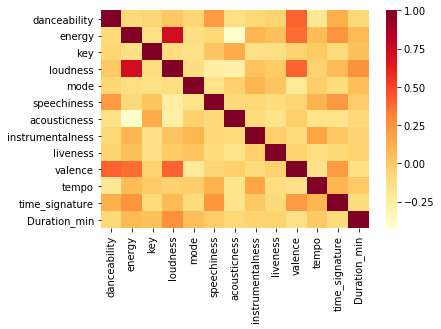

In [8]:
sns.heatmap(df.corr(),cmap="YlOrRd")

**ANALYSIS:** We can observe in the strongest tones the existing correlations between the different columns, at first glance the `"loudness and energy"` columns call our attention but our duty is to explore the behavior of each one of the variables.

# Top 10 artists with the largest presence in the Top 100

In [9]:
df['artists'].value_counts().head(10)

Post Malone       6
XXXTENTACION      6
Drake             4
Ed Sheeran        3
Marshmello        3
Dua Lipa          2
Khalid            2
Maroon 5          2
Calvin Harris     2
Camila Cabello    2
Name: artists, dtype: int64

# Danceablity column analysis

/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


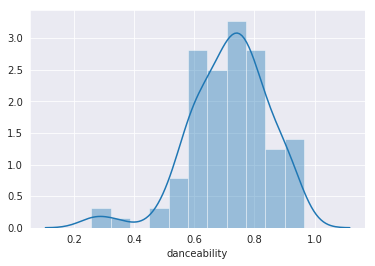

In [10]:
sns.set_style(style='darkgrid')
sns.distplot(df['danceability'],hist=True,kde=True)

**ANALYSIS:** In this graph we can see that most of the tracks are considered danceable from values ​​higher than 0.5, but to make a better analysis we are going to divide them into 3 groups:

* Greater than 75% --- Very danceable
* between 50% and 74% - Regularly danceable
* Minor 50% - non-danceable or instrumental music

In [11]:
# Set conditions
Vd=df['danceability']>=0.75
Ld=(df['danceability']>=0.5) & (df['danceability']<0.75)
Nd=df['danceability']<0.5

In [12]:
# Create DataFrame 

In [13]:
data=[Vd.sum(),Ld.sum(),Nd.sum()]
Dance=pd.DataFrame(data,columns=['percent'],
                   index=['Very','Regular','Instrumental'])

In [14]:
Dance

,percent
Very,43
Regular,53
Instrumental,4


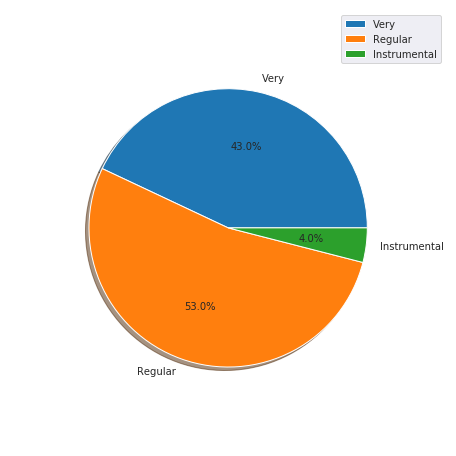

In [15]:
plt.figure(figsize=(8,8))
plt.pie(Dance,labels=Dance.index,autopct='%1.1f%%',shadow=True,radius=0.8)
plt.legend(loc=0)

# Energy tracks

/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


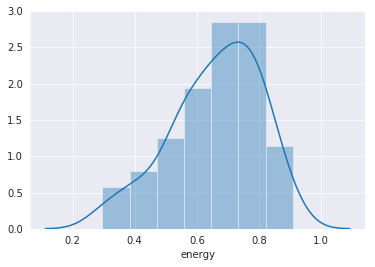

In [16]:
sns.distplot(df['energy'])

In [17]:
# Set conditions
Ve=df['energy']>=0.75
Re=(df['energy']>=0.5) & (df['energy']<0.75)
Le=df['energy']<0.5

In [18]:
#Create DataFrame
data=[Ve.sum(),Re.sum(),Le.sum()]
Energy=pd.DataFrame(data,columns=['percent'],
                   index=['Very Energy','Regular Energy','Low Energy'])

In [19]:
Energy

,percent
Very Energy,32
Regular Energy,55
Low Energy,13


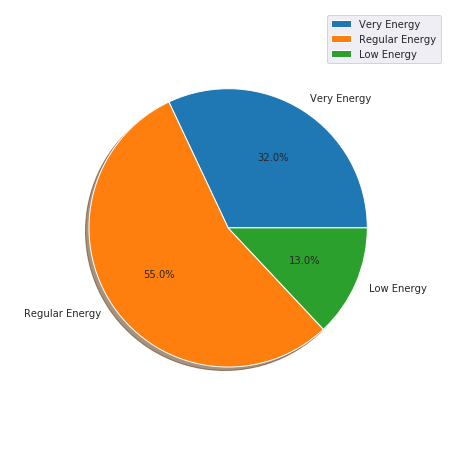

In [20]:
plt.figure(figsize=(8,8))
plt.pie(Energy,labels=Energy.index,autopct='%1.1f%%',shadow=True,radius=0.8)
plt.legend(loc=0)

# Correlation  Zone 

In this area we will take into account the most important variables according to the preliminary analysis of the heat maps previously seen


In [21]:
Correlation=df[['danceability','energy','valence','loudness','tempo']]

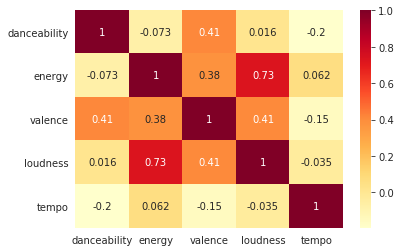

In [22]:
sns.heatmap(Correlation.corr(),annot=True,cmap="YlOrRd")

/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


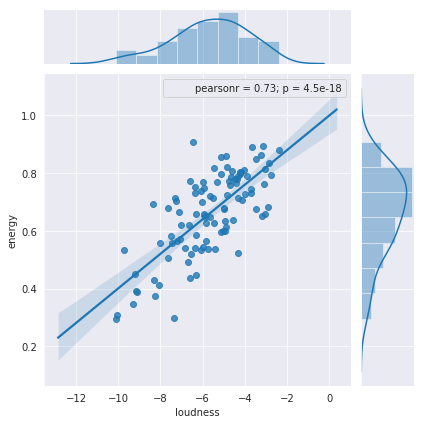

In [23]:
sns.jointplot(data=Correlation,y='energy',x='loudness',kind='reg',stat_func=pearsonr)

**ANALYSIS:** We can clearly observe that as the values ​​of loudness are closer to zero the probability that our song has a high content of rhythms is higher, in general these values ​​should be kept below zero but not very far away

# What is the musical tempo?
At first the musical scores did not give us indications about the tempo or they were very scarce, so each interpreter performed it at ease, but the idea of ​​the tempo begins to change from the eighteenth and nineteenth century, possibly as a consequence of the fact that composers will be tired of listening to interpretations of their works with completely arbitrary times. Then came a notation that expressed the "speed" or form that the works should be executed.

The 5 most usual ones were:

* Length: very slow (20 bpm)
* Adagio: slow and majestic (66 to 76 bpm)
* Andante: at the pace, quiet, a little vivacious (76 to 108 bpm)
* Allegro: animated and fast. (110 to 168 bpm).
* Presto: very fast (168 to 200 bpm).

In [24]:
df['Rhythm']=df['tempo']

In [25]:
# Cycle to create the rhythm type column according to the speed
for i in range(99):
    if df['tempo'][i]>168:
        df['Rhythm'][i]='Presto'
    if (df['tempo'][i]>=110) & (df['tempo'][i]<=168):
        df['Rhythm'][i]='Allegro'
    elif (df['tempo'][i]>=76) & (df['tempo'][i]<=108):
        df['Rhythm'][i]='Andante'
    elif (df['tempo'][i]>=66) & (df['tempo'][i]<=76):
        df['Rhythm'][i]='Adagio'
    elif df['tempo'][i]<65:
        df['Rhythm'][i]='Length' 

/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stu

In [26]:
# We confirm that the change has actually been made

In [27]:
df[['tempo','Rhythm']].head()

,tempo,Rhythm
0,77.169,Andante
1,75.023,Adagio
2,159.847,Allegro
3,140.124,Allegro
4,91.030,Andante



# Classification according to the tempo of the track

In [28]:
df['Rhythm'].value_counts()

Allegro    46
Andante    44
Presto      7
126.684     1
Length      1
Adagio      1
Name: Rhythm, dtype: int64

**NOTE:** As we can see these songs are influenced by the intermediate rhythms offered by the following genres:
 * Hip hop
 * reggaeton
 * Pop
 * Rap
        

# Top 10 of the most danceable songs

In [29]:
df[['name','artists','danceability','valence','tempo','Rhythm']].sort_values(by='danceability',ascending=False).head(10)

,name,artists,danceability,valence,tempo,Rhythm
91,Yes Indeed,Lil Baby,0.964,0.562,119.958,Allegro
55,FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,0.931,0.376,125.978,Allegro
19,Look Alive (feat. Drake),BlocBoy JB,0.922,0.595,140.022,Allegro
18,Moonlight,XXXTENTACION,0.921,0.711,128.009,Allegro
61,Nonstop,Drake,0.912,0.422,154.983,Allegro
89,Bella,Wolfine,0.909,0.844,94.016,Andante
73,Walk It Talk It,Migos,0.909,0.406,145.905,Allegro
82,HUMBLE.,Kendrick Lamar,0.908,0.421,150.011,Allegro
21,Te Bot? - Remix,Nio Garcia,0.903,0.442,96.507,Andante
30,Taste (feat. Offset),Tyga,0.884,0.342,97.994,Andante


# Top 10 songs with the most energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [30]:
df[['name','artists','energy','valence','tempo','Rhythm']].sort_values(by='energy',ascending=False).head(10)

,name,artists,energy,valence,tempo,Rhythm
12,Nice For What,Drake,0.909,0.757,93.394,Andante
77,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.895,0.794,94.968,Andante
34,?chame La Culpa,Luis Fonsi,0.889,0.649,96.024,Andante
9,FRIENDS,Marshmello,0.880,0.534,95.079,Andante
7,One Kiss (with Dua Lipa),Calvin Harris,0.862,0.592,123.994,Allegro
46,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.859,0.926,105.115,Andante
23,Youngblood,5 Seconds of Summer,0.854,0.152,120.274,Allegro
41,Dura,Daddy Yankee,0.848,0.828,95.000,Andante
45,Jackie Chan,Ti?sto,0.834,0.687,128.005,Allegro
43,Thunder,Imagine Dragons,0.822,0.288,167.997,Allegro


# Top 10 songs more likely to create positive feelings

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [31]:
df[['name','artists','energy','valence','tempo','Rhythm']].sort_values(by='valence',ascending=False).head(10)

,name,artists,energy,valence,tempo,Rhythm
25,Shape of You,Ed Sheeran,0.652,0.931,95.977,Andante
46,Finesse (Remix) [feat. Cardi B],Bruno Mars,0.859,0.926,105.115,Andante
89,Bella,Wolfine,0.493,0.844,94.016,Andante
66,D?jala que vuelva (feat. Manuel Turizo),Piso 21,0.788,0.839,170.019,Presto
78,Criminal,Natti Natasha,0.813,0.839,79.997,Andante
41,Dura,Daddy Yankee,0.848,0.828,95.000,Andante
59,Sin Pijama,Becky G,0.745,0.820,94.014,Andante
77,"1, 2, 3 (feat. Jason Derulo & De La Ghetto)",Sofia Reyes,0.895,0.794,94.968,Andante
44,Me Niego,Reik,0.779,0.768,94.023,Andante
12,Nice For What,Drake,0.909,0.757,93.394,Andante


# Analysis of artists with greater presence in the 100 most played songs of 2018

We are going to analyze the 4 artists with more songs within the Top 100 to see taste patterns among the clients

In [32]:
df['artists'].value_counts().head(4)

Post Malone     6
XXXTENTACION    6
Drake           4
Ed Sheeran      3
Name: artists, dtype: int64

# Artista XXXTENTATION

In [33]:
XXXTENT=df[df['artists']=='XXXTENTACION']

In [34]:
XXXTENT[['name','danceability','energy','loudness','valence','tempo','Rhythm']]

,name,danceability,energy,loudness,valence,tempo,Rhythm
1,SAD!,0.740,0.613,-4.880,0.473,75.023,Adagio
18,Moonlight,0.921,0.537,-5.723,0.711,128.009,Allegro
28,Jocelyn Flores,0.872,0.391,-9.144,0.437,134.021,Allegro
38,changes,0.669,0.308,-10.068,0.520,64.934,Length
62,Fuck Love (feat. Trippie Redd),0.797,0.533,-9.740,0.329,131.036,Allegro
94,Everybody Dies In Their Nightmares,0.734,0.570,-7.066,0.689,129.953,Allegro


**NOTE:** Although according to the data presented the artist is characterized by having more danceable tracks one could say that his influence in this ranking is due to the Hip Hop genre due to the speed belongs to the rhythm "ALLEGRO".

# Artista Post Malone

In [35]:
PMalone=df[df['artists']=='Post Malone']

In [36]:
PMalone[['name','danceability','energy','loudness','valence','tempo','Rhythm']]

,name,danceability,energy,loudness,valence,tempo,Rhythm
2,rockstar (feat. 21 Savage),0.587,0.535,-6.090,0.140,159.847,Allegro
3,Psycho (feat. Ty Dolla $ign),0.739,0.559,-8.011,0.439,140.124,Allegro
5,Better Now,0.680,0.563,-5.843,0.374,145.028,Allegro
32,I Fall Apart,0.556,0.538,-5.408,0.291,143.950,Allegro
75,Candy Paint,0.670,0.654,-5.944,0.438,180.024,Presto
76,Congratulations,0.630,0.804,-4.183,0.492,123.146,Allegro


**NOTE:** In the case of this artist we can observe the same tendency with respect to the rhythm "ALLEGRO".

# Artista Drake

In [37]:
Drake=df[df['artists']=='Drake']

In [38]:
Drake[['name','danceability','energy','loudness','valence','tempo','Rhythm']]

,name,danceability,energy,loudness,valence,tempo,Rhythm
0,God's Plan,0.754,0.449,-9.211,0.357,77.169,Andante
4,In My Feelings,0.835,0.626,-5.833,0.350,91.030,Andante
12,Nice For What,0.586,0.909,-6.474,0.757,93.394,Andante
61,Nonstop,0.912,0.412,-8.074,0.422,154.983,Allegro


# Artista Ed Sheran 

In [39]:
Edshe=df[df['artists']=='Ed Sheeran']
Edshe[['name','danceability','energy','loudness','valence','acousticness','tempo','Rhythm']]

,name,danceability,energy,loudness,valence,acousticness,tempo,Rhythm
25,Shape of You,0.825,0.652,-3.183,0.931,0.581,95.977,Andante
29,Perfect,0.599,0.448,-6.312,0.168,0.163,95.050,Andante
84,Perfect Duet (Ed Sheeran & Beyonc?),0.587,0.299,-7.365,0.356,0.779,94.992,Andante



# Treatment of the data regarding the 'MODE' column

We will analyze the data in such a way that we consider values ​​higher than 0.5 in the danceability and energy columns because most of the data are concentrated in these ranges and we do not want values ​​lower than 0.5, affecting a possible correlation between columns.

**Mode Column**

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [40]:
Mayores=df[df['mode']==1]
Menores=df[df['mode']==0]

In [41]:
# Separation of the variables according to the scale to which Major or minor belongs

In [42]:
MayoresD=Mayores[Mayores['danceability']>=0.5]
MenoresD=Menores[Menores['danceability']>=0.5]

In [43]:
# We eliminate the columns that say nothing in the study

In [44]:
MayoresD=Mayores.drop(columns=['mode','time_signature'])
MenoresD=Menores.drop(columns=['mode','time_signature'])

In [45]:
# Heat map for Major scales

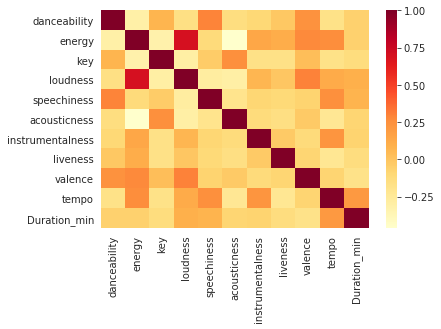

In [46]:
sns.heatmap(MayoresD.corr(),cmap="YlOrRd")

In [47]:
# Heat map for Less scales

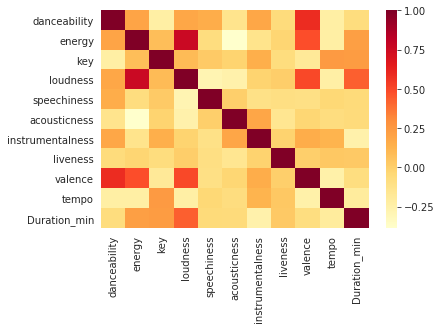

In [48]:
sns.heatmap(MenoresD.corr(),cmap="YlOrRd")

In [49]:
# We create the variables and assign the columns that we want to correlate

In [50]:
MaycorD=MayoresD[['danceability','energy','valence','loudness','tempo']]
MencorD=MenoresD[['danceability','energy','valence','loudness','tempo']]

In [51]:
# Major scale correlation

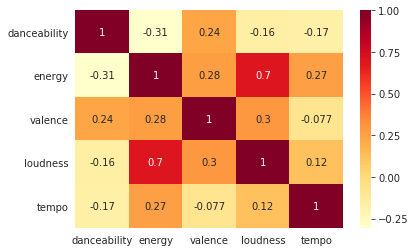

In [52]:
sns.heatmap(MaycorD.corr(),annot=True,cmap="YlOrRd")

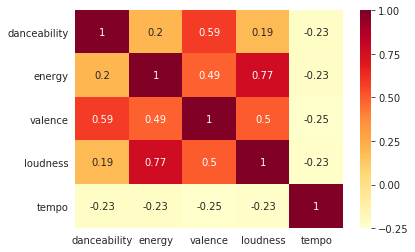

In [53]:
sns.heatmap(MencorD.corr(),annot=True,cmap="YlOrRd")


**ANALISIS:** Como podemos observar las pistas con escalas menores nos brindan una mejor correlacion entre las variables


# Keys
keyThe key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

In [54]:
for i in range(100):
    if df['key'][i]==0 : df['key'][i]='C'
    elif df['key'][i]==1 : df['key'][i]='C#'
    elif df['key'][i]==2 : df['key'][i]='D'
    elif df['key'][i]==3 : df['key'][i]='D#'
    elif df['key'][i]==4 : df['key'][i]='E'
    elif df['key'][i]==5 : df['key'][i]='F'    
    elif df['key'][i]==6 : df['key'][i]='F#'
    elif df['key'][i]==7 : df['key'][i]='G'
    elif df['key'][i]==8 : df['key'][i]='G#'
    elif df['key'][i]==9 : df['key'][i]='A'
    elif df['key'][i]==10 : df['key'][i]='A#'
    elif df['key'][i]==11 : df['key'][i]='B'
        

/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from 

Text(0.5, 1.0, 'Popular keys')

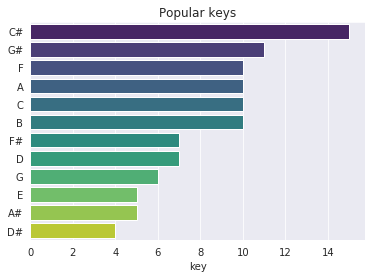

In [55]:
sns.set_style(style='darkgrid')
keys=df['key'].value_counts()
key_DF=pd.DataFrame(keys)
sns.barplot(x=key_DF.key, y=key_DF.index, palette="viridis")
plt.title('Popular keys')

# Parameter relationship by key

As we can see the most danceable tracks go by the key "G and C #" and those that have more energy have "F #, C # and D" 

In [56]:
df[['danceability','energy','valence','key']].groupby(by='key').mean().sort_values(by='danceability',ascending=False)

,danceability,energy,valence
key,,,
G,0.764167,0.581000,0.427833
C#,0.762000,0.695800,0.570533
A,0.760300,0.680000,0.563600
A#,0.740800,0.663000,0.501600
C,0.735400,0.679600,0.469300
D#,0.721500,0.669000,0.485150
F,0.716400,0.631200,0.527800
B,0.702000,0.623100,0.423670
D,0.701571,0.698857,0.373714


# Conclusions:

To answer the 2 initial questions posed by this data set, we can say that there was only a correlation between energy and noise, on the other hand, you can see that the main reason for people to like these songs is In relation to the time of the track, let's say that most of the tracks were within the range "ALLEGRO" and "ANDANTE" that are characteristic of the genres:

* Hip hop
* reggaeton
* Pop
* Rap



**FINAL!!!!**